# Yeva Aksonova


## K13;          V-101


## Version of:
Pandas - 1.5.3;

matplotlib- 3.6.3

P=6

### TASK_0 

(Cleaning data)

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np


In [2]:
path = "weather.csv"
df = pd.read_csv(path, names=('d', 'cl', 'precip',
                              'D.t', 'N.t',
                  'W.pow', 'per'), header=0)

df.replace('-', np.nan, inplace=True)

In [3]:
df['cl'] = df['cl'].str.replace('%', '', regex=False).astype(int)

df['precip'] = df['precip'].str.replace('м.м.', '', regex=False)
df['precip'] = pd.to_numeric(df['precip'], errors='coerce', downcast='unsigned')
df['precip'] =df['precip'].astype(pd.Int64Dtype())

df['D.t'] = df['D.t'].astype(str)
df['D.t'] = df['D.t'].str.replace('°C', '').astype(float)

df['N.t'] = df['N.t'].astype(str)
df['N.t'] = df['N.t'].str.replace('°C', '').astype(float)

df['W.pow'] = df['W.pow'].str.replace('м/с', '', regex=False).astype(int)



In [4]:
df['per'] = pd.to_datetime(df['per'])
df['m'] = df['per'].dt.month
df.groupby('m')
df

,d,cl,precip,D.t,N.t,W.pow,per,m
0,1,72,<NA>,13.5,6.0,4,2023-04-01,4
1,2,100,1,8.0,8.5,3,2023-04-01,4
2,3,100,2,6.0,6.0,4,2023-04-01,4
3,4,100,<NA>,5.0,2.0,3,2023-04-01,4
4,5,87,4,7.5,3.0,5,2023-04-01,4
...,...,...,...,...,...,...,...,...
360,27,64,1,19.5,13.0,6,2022-05-01,5
361,28,39,<NA>,17.0,10.0,4,2022-05-01,5
362,29,38,<NA>,18.5,10.5,3,2022-05-01,5
363,30,86,4,15.5,12.5,4,2022-05-01,5


### TASK_1

For period P, plot line graphs of changes in daytime temperature, night temperature, cloudiness, and wind strength by day


In [5]:
P =(df['m'] == 6)

In [6]:
gr1=df.loc[P, ['cl', 'D.t', 'N.t', 'W.pow']]
gr1

,cl,D.t,N.t,W.pow
304,39,24.0,12.0,2
305,47,27.0,16.5,2
306,15,23.0,14.0,3
307,19,23.5,14.0,2
308,60,18.0,15.5,3
309,19,22.5,13.0,3
310,30,24.0,16.0,1
311,27,26.0,18.5,2
312,22,26.5,21.0,3
313,20,28.0,18.5,3


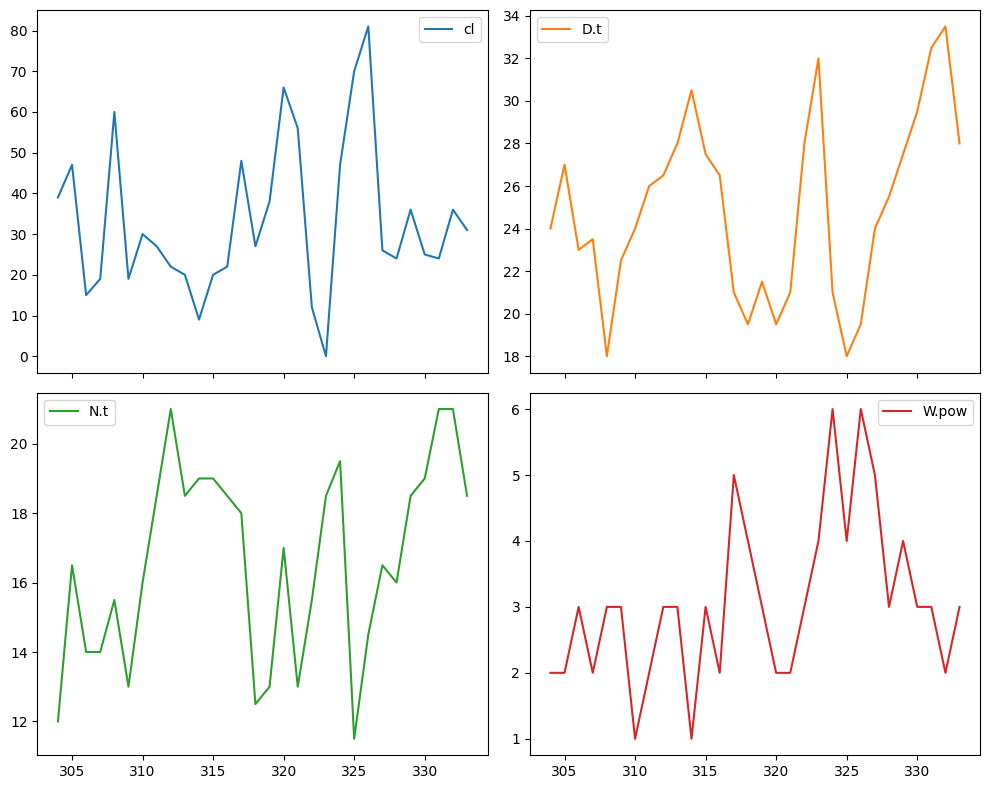

In [7]:
gr1.plot(kind='line', subplots=True, layout=(2, 2), figsize=(10, 8))
plt.tight_layout()

### TASK_2

The bubble (scatter) graph of daily temperature

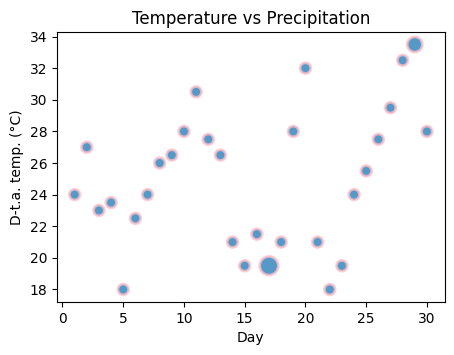

In [8]:
data = df[P]

x = data['d']
y = data['D.t']
sizes = data['precip'].fillna(1)

sizes = [10 if pd.isna(precipitation) else precipitation * 60 for precipitation in sizes]

plt.figure(figsize=(5, 3.5))
plt.scatter(x, y, s=sizes, alpha=0.75, edgecolor='pink', linewidth=2)

plt.xlabel('Day')
plt.ylabel('D-t.a. temp. (°C)')
plt.title('Temperature vs Precipitation')

plt.show()


### TASK_3

Find the monthly average deviation of night temperature from daytime


In [9]:
df['dev'] = df['D.t'] - df['N.t']

monthly_avg_deviation = df.groupby('m')['dev'].mean()
monthly_avg_deviation

m
1     2.467742
2     3.089286
3     4.693548
4     4.350000
5     7.451613
6     8.316667
7     8.661290
8     9.403226
9     5.416667
10    5.048387
11    3.200000
12    2.596774
Name: dev, dtype: float64

### TASK_4

 The biggest discrepancy between day and night temperatures

In [10]:
larg_values = df.groupby('m', group_keys=False)['dev'].apply(lambda x: x.abs()).max()
largest_deviation = df.loc[df['dev'].abs() == larg_values]
largest_deviation

,d,cl,precip,D.t,N.t,W.pow,per,m,dev
267,26,9,<NA>,36.5,20.5,4,2022-08-01,8,16.0


### TASK_5

4 windiest days in period P

In [11]:
windiest_days = df[P].nlargest(4, 'W.pow')
windiest_days

,d,cl,precip,D.t,N.t,W.pow,per,m,dev
324,21,47,1,21.0,19.5,6,2022-06-01,6,1.5
326,23,81,<NA>,19.5,14.5,6,2022-06-01,6,5.0
317,14,48,1,21.0,18.0,5,2022-06-01,6,3.0
327,24,26,<NA>,24.0,16.5,5,2022-06-01,6,7.5


### TASK_6

The number of days with precipitation in the month

Text(0.5, 1.0, 'Days with Precipitation by Month')

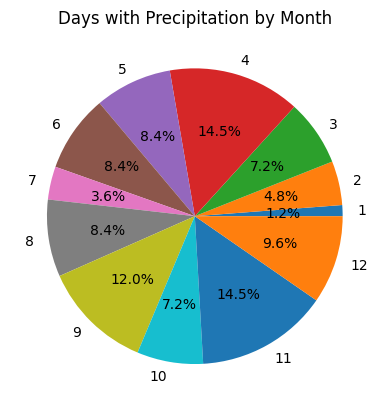

In [12]:
precip_days = df[df['precip'].notna()].groupby('m')['d'].count()

plt.pie(precip_days, labels=precip_days.index, autopct='%.1f%%')
plt.title('Days with Precipitation by Month')

### TASK_7

Сloudiness

Text(0.5, 1.0, 'Day Type')

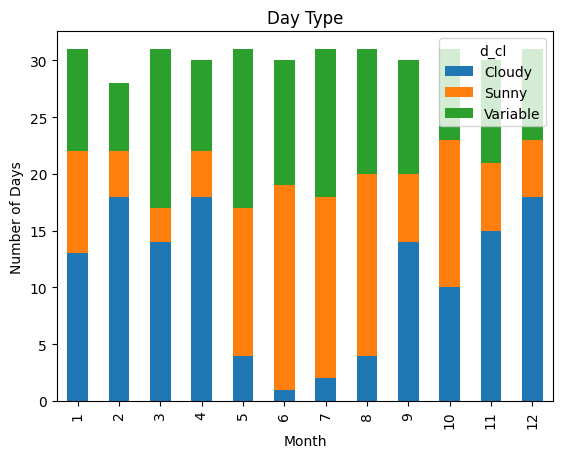

In [13]:
def day_type(cloudiness):
    if cloudiness > 70:
        return 'Cloudy'
    elif cloudiness < 35:
        return 'Sunny'
    else:
        return 'Variable'

df['d_cl'] = df['cl'].apply(day_type)

grouped_data = df.groupby(['m', 'd_cl']).size().unstack(fill_value=0)

grouped_data.plot(kind='bar', stacked=True)

plt.xlabel('Month')
plt.ylabel('Number of Days')
plt.title('Day Type')

### TASK_8

All the months in which there were more sunny days than days with precipitation

In [14]:
n_sunny = df.groupby('m')['cl'].apply(lambda x: (x < 35).sum())
n_perc = df.groupby('m')['precip'].count()

sunny_months = n_sunny[n_sunny > n_perc].index
print('Lucky sunny days:)')
print(*sunny_months, sep=',\n')

Lucky sunny days:)
1,
5,
6,
7,
8,
10


### TASK_9

Histogram of the deviation of night temperature from daytime

Text(0.5, 1.0, 'Temperature Deviation')

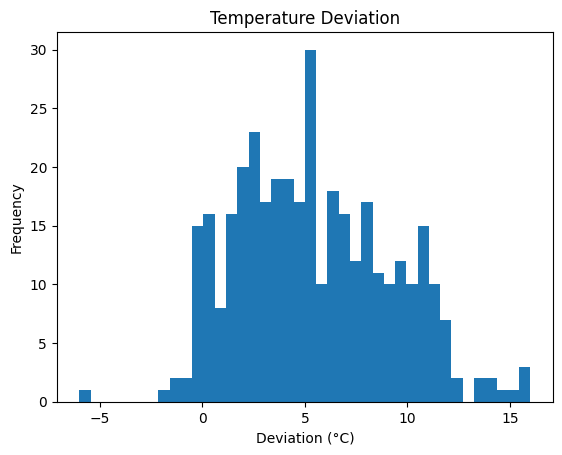

In [15]:
plt.hist(df['dev'], bins=40)
plt.xlabel('Deviation (°C)')
plt.ylabel('Frequency')
plt.title('Temperature Deviation')